In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
ls

Analyzing_Spotify_Audio_Features.ipynb
Get Song metadata from Spotify.ipynb
Get_Artists_Popular_Songs.ipynb
Get_all_artists_from_genius.com.ipynb
John Mayer – Bigger Than My Body Lyrics | Genius Lyrics.
Pull_genius_songs_audio_genre_from_spotify.ipynb
all_artist_to_popular_songs.pkl
all_genius_artist_genres.csv
artist_to_popular_songs/
artists_songs.csv
audio_feature_data.csv
env/
env3/
music_lyrics/
songLyricsExtractor.py
spotify_artist_genres.csv
spotify_song_metadata.csv
subsampled_audio_features
subsampled_genius_artist_spotify_song_metadata.csv
top_artist_songs.csv
top_artists_with_song_lyrics.csv


In [151]:
song_metadata = pd.read_csv("subsampled_genius_artist_spotify_song_metadata.csv")
genres = pd.read_csv("selected_artists.csv")
audio_features = pd.read_csv("subsampled_audio_features")

In [152]:
song_metadata.head()

,Unnamed: 0,album,artist_name,id,song_name,song_uri,track_number
0,0,Back 2 The Beach,Yung Pinch,3xmsmrufmGULmdWToT78jD,Beach Ballin' (feat. blackbear),spotify:track:3xmsmrufmGULmdWToT78jD,1.0
1,1,Back 2 The Beach,Yung Pinch,2R3aB2ic4dLTu7VEv7DxT6,Lingo (feat. YG),spotify:track:2R3aB2ic4dLTu7VEv7DxT6,2.0
2,2,Back 2 The Beach,Yung Pinch,0QigEd6yRtZlMnVZFoYe2b,Sober,spotify:track:0QigEd6yRtZlMnVZFoYe2b,3.0
3,3,Back 2 The Beach,Yung Pinch,43HRfCLhkeRRNGDGoVHoW3,Toast To Us,spotify:track:43HRfCLhkeRRNGDGoVHoW3,4.0
4,4,Back 2 The Beach,Yung Pinch,4yHlnFIiNOze4ARV32RFPt,"My Friends, Not Yours",spotify:track:4yHlnFIiNOze4ARV32RFPt,5.0


In [153]:
genres.head()

,artist,genres,is_rap,is_pop,is_rnb,is_rock,is_country
0,Yung Pinch,rap,True,False,False,False,False
1,Yung Ralph,rap,True,False,False,False,False
2,Zac Brown Band,country,False,False,False,False,True
3,Elohim,pop,False,True,False,False,False
4,Elvis Costello,rock,False,False,False,True,False


In [154]:
song_data = song_metadata.merge(audio_features, how='inner', left_on='song_uri', right_on='uri').merge(
                    genres, how='inner', left_on='artist_name', right_on='artist')

In [155]:
song_data.shape

(11468, 26)

### Classifier for song_genre

In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [157]:
rf = RandomForestClassifier()

In [158]:
song_data.columns

Index(['Unnamed: 0_x', 'album', 'artist_name', 'id', 'song_name', 'song_uri',
       'track_number', 'Unnamed: 0_y', 'uri', 'danceability', 'energy',
       'accousticness', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'popularity', 'artist', 'genres',
       'is_rap', 'is_pop', 'is_rnb', 'is_rock', 'is_country'],
      dtype='object')

In [159]:
features = ['danceability', 'energy', 'accousticness', 
 'instrumentalness', 'liveness', 'loudness',
 'speechiness', 'tempo', 'valence', 'popularity']
target = 'is_rap'

In [160]:
rf.fit(song_data[:8000][features], song_data[:8000][target])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [161]:
predictions = rf.predict(song_data[8000:][features])

In [162]:
roc_auc_score(song_data[8000:][target], predictions)

0.8798338121979888

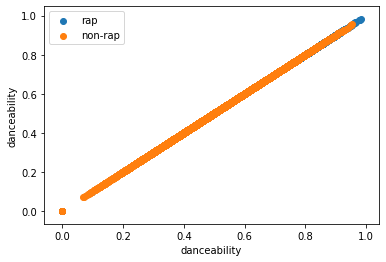

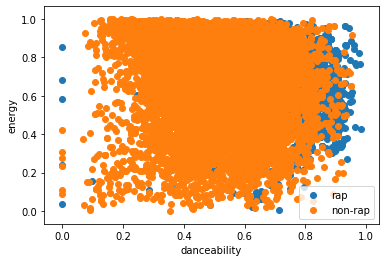

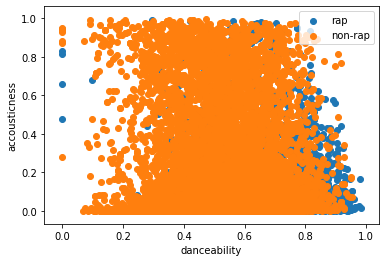

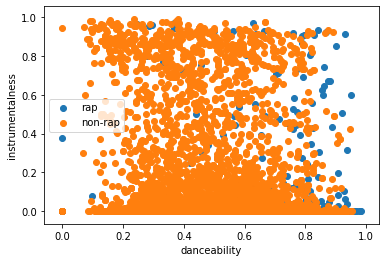

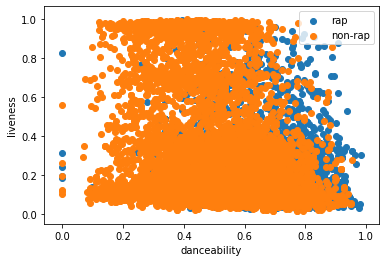

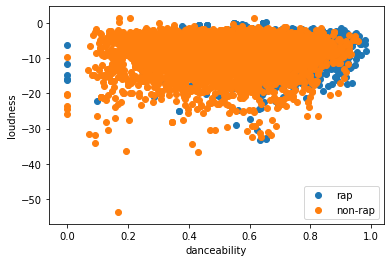

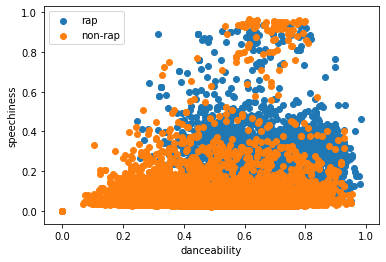

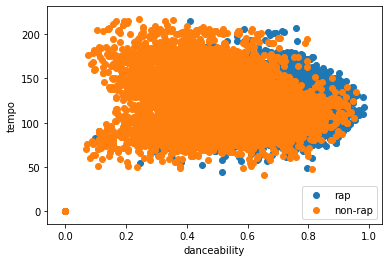

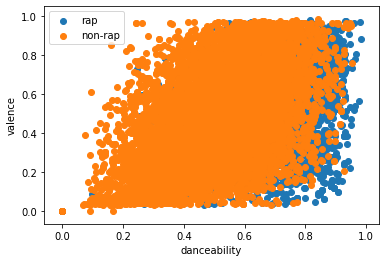

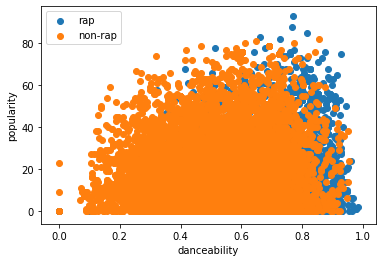

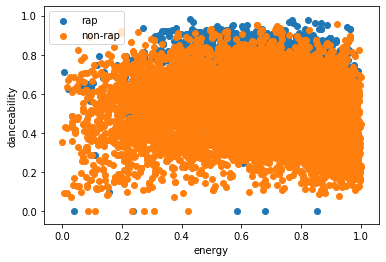

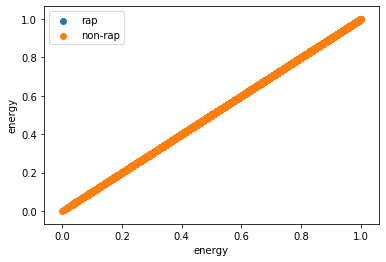

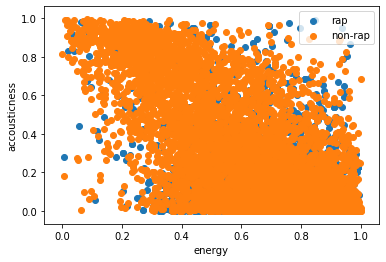

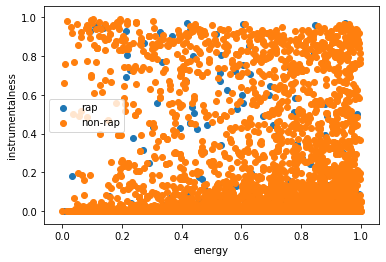

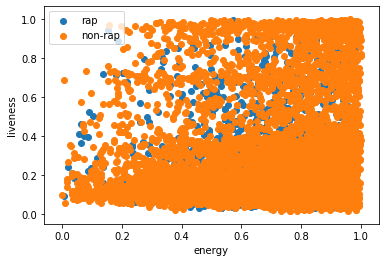

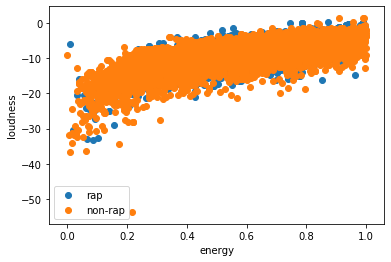

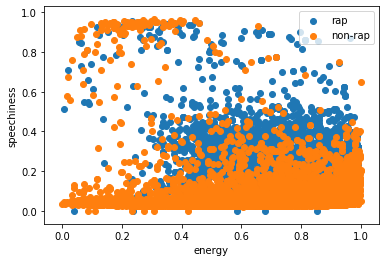

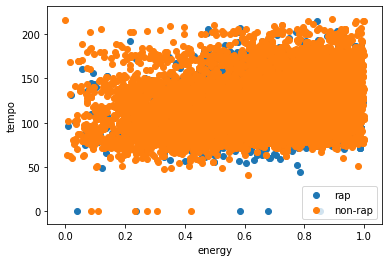

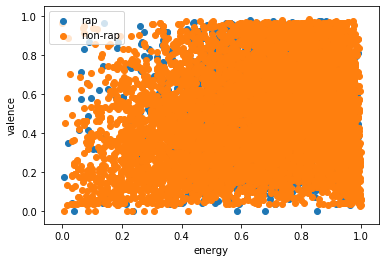

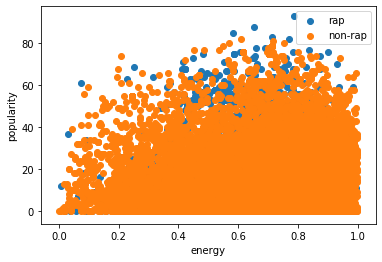

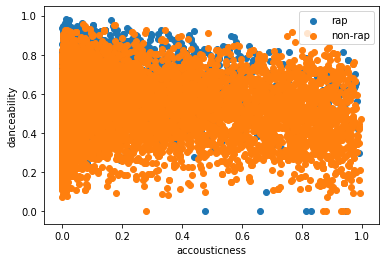

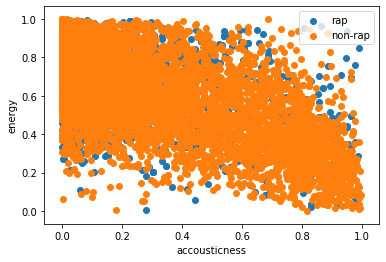

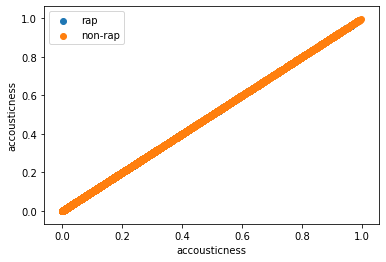

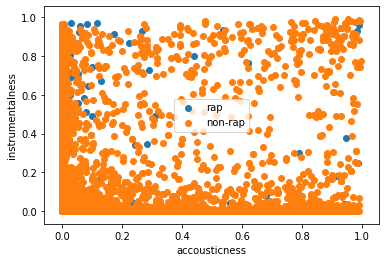

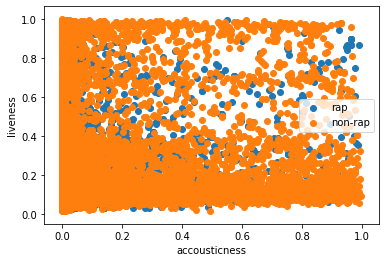

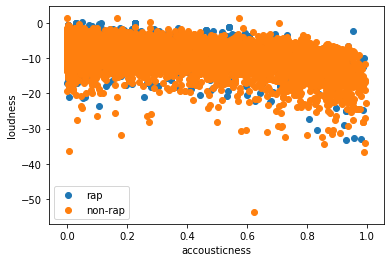

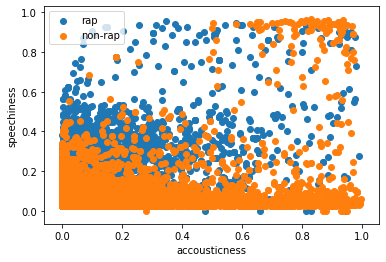

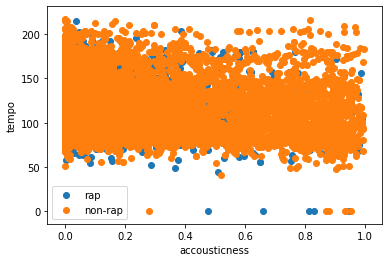

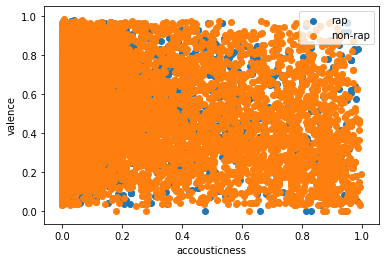

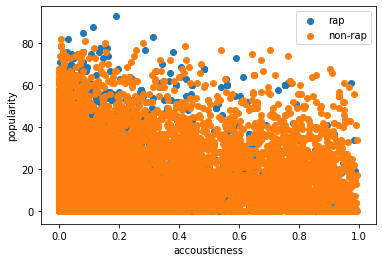

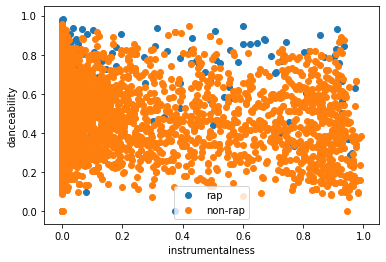

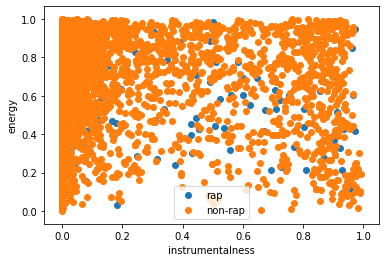

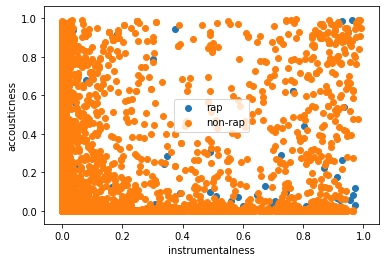

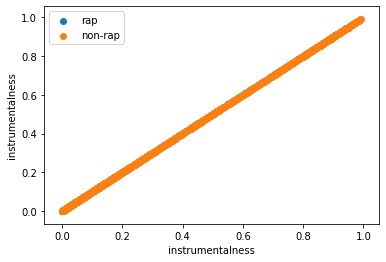

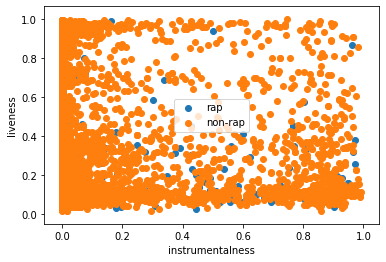

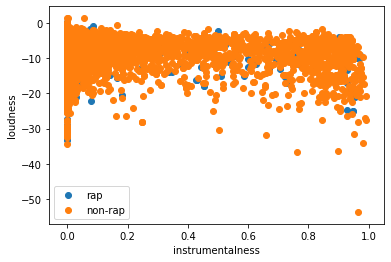

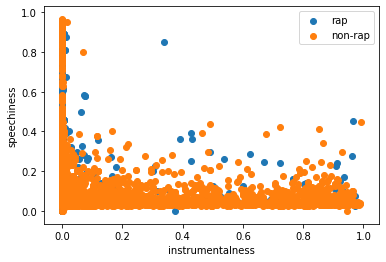

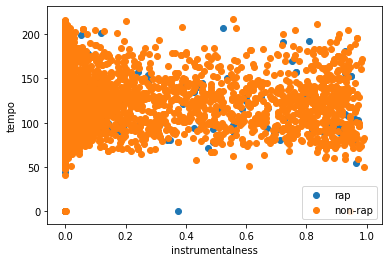

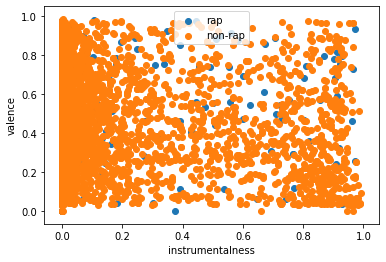

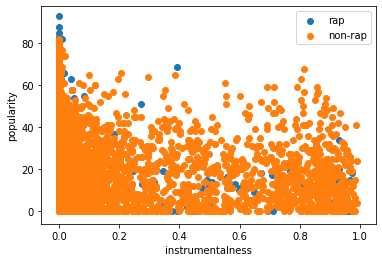

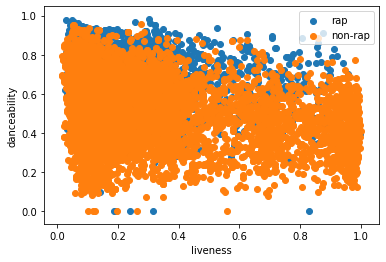

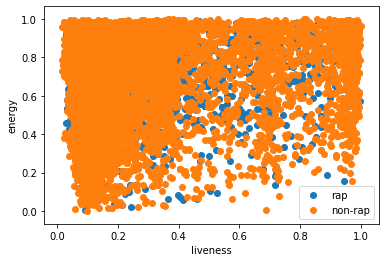

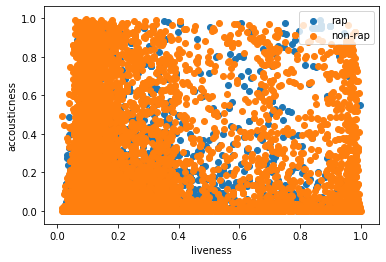

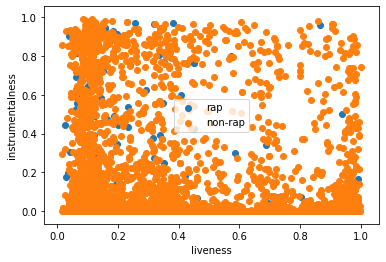

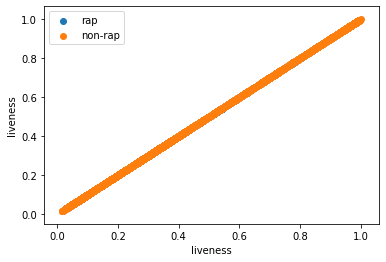

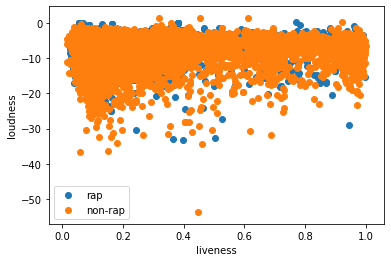

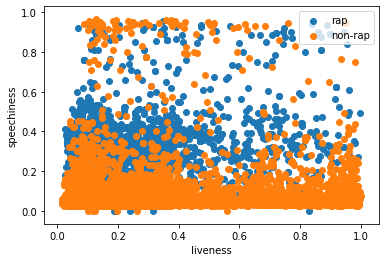

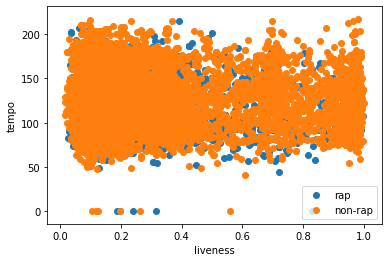

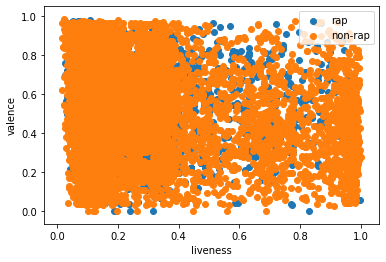

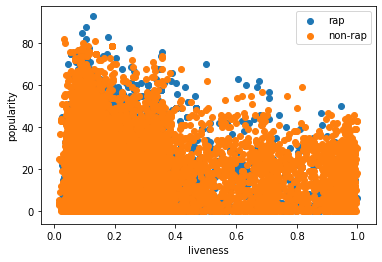

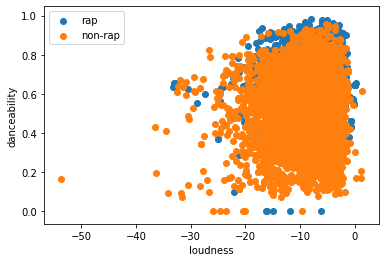

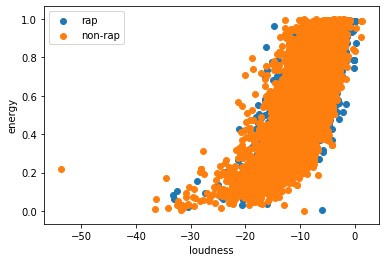

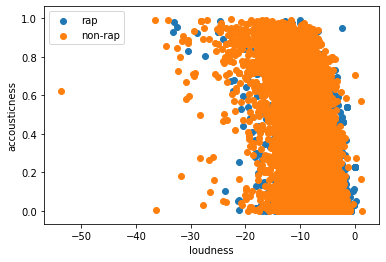

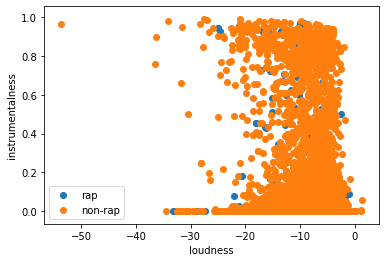

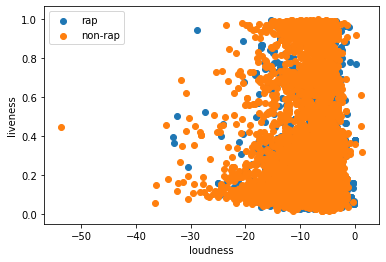

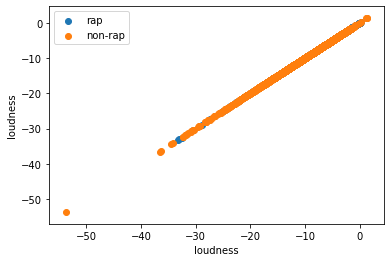

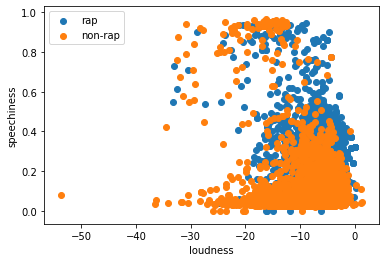

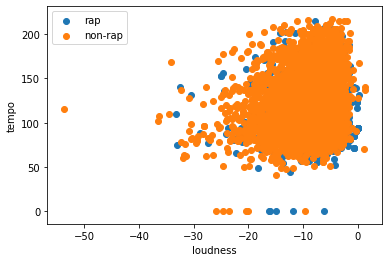

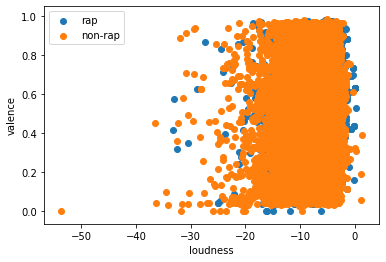

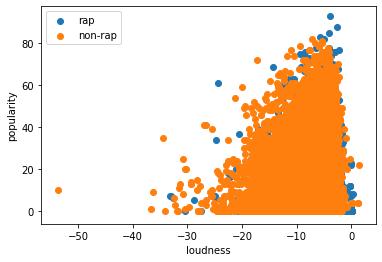

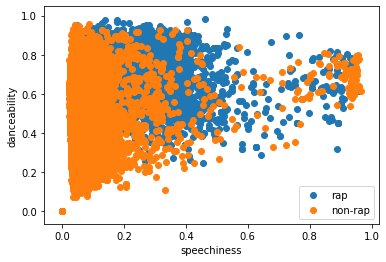

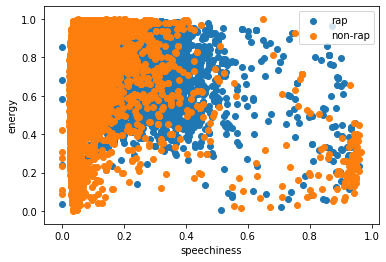

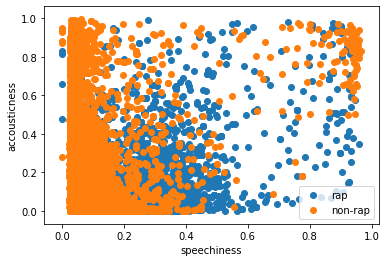

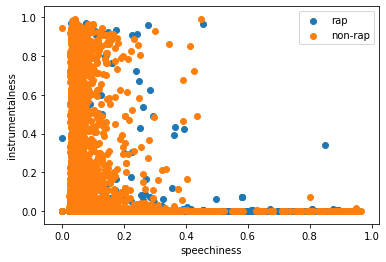

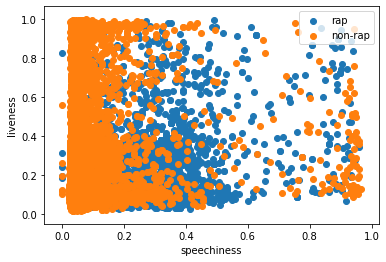

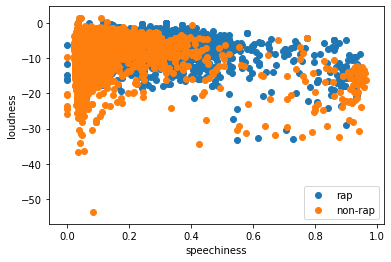

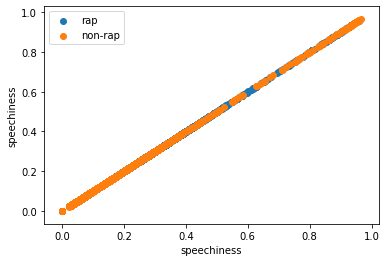

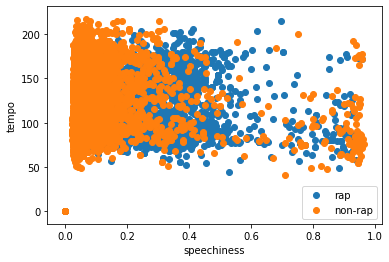

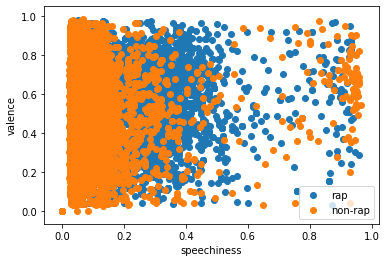

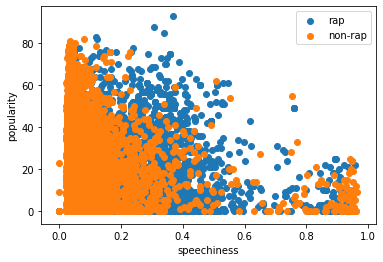

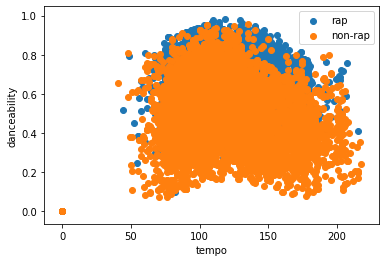

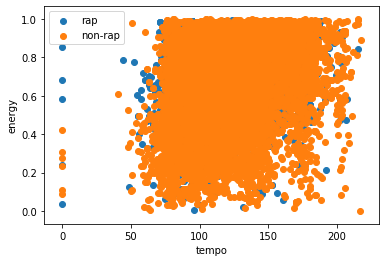

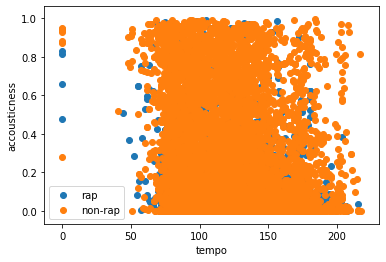

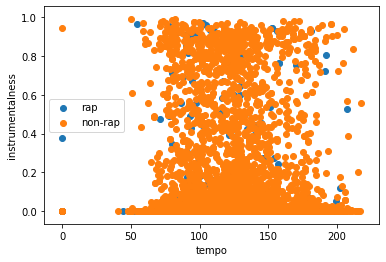

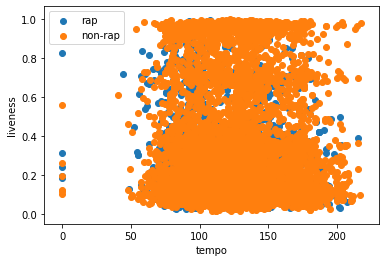

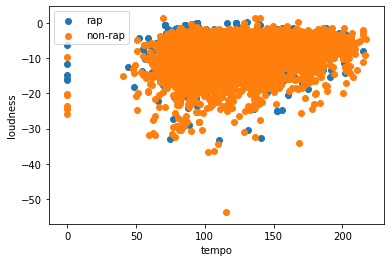

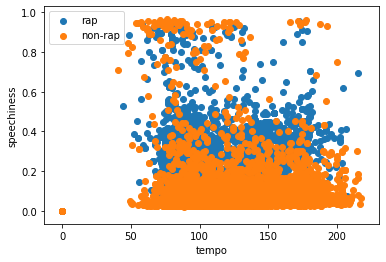

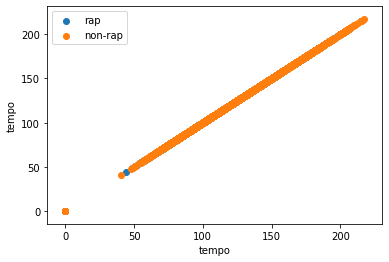

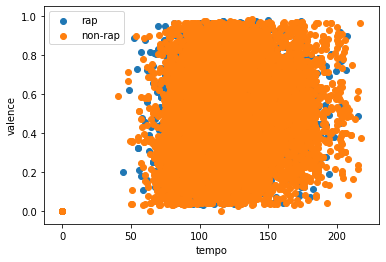

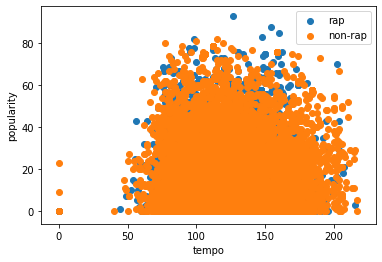

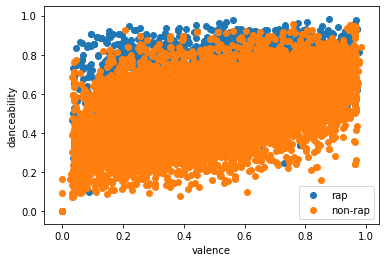

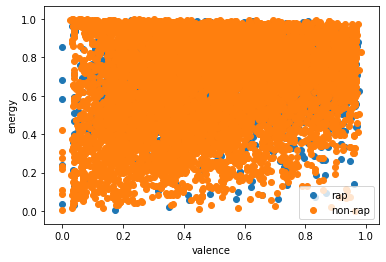

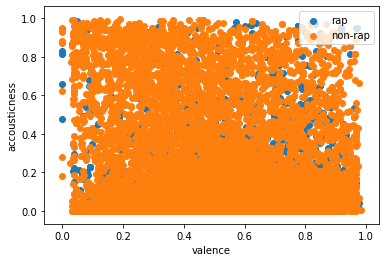

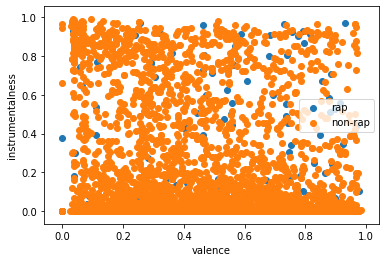

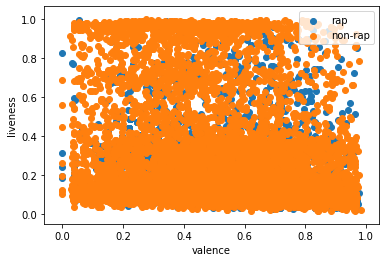

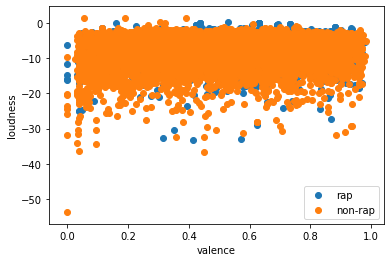

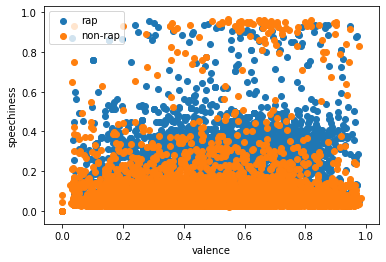

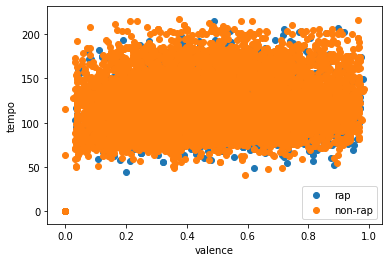

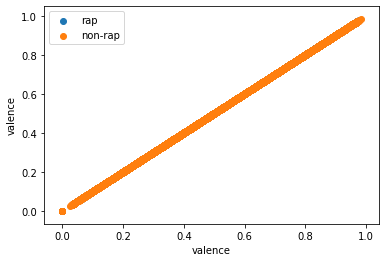

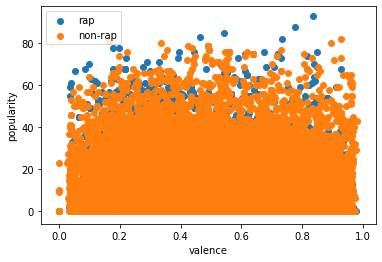

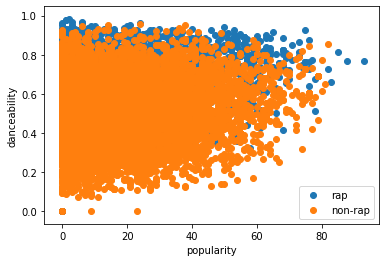

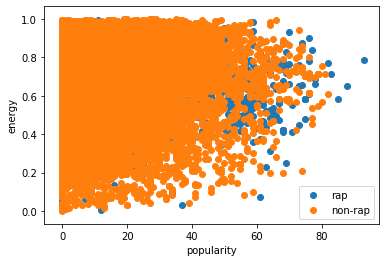

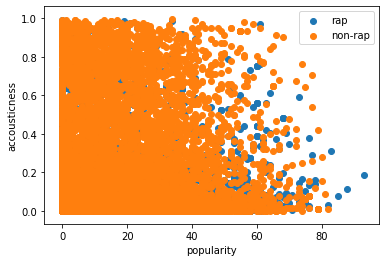

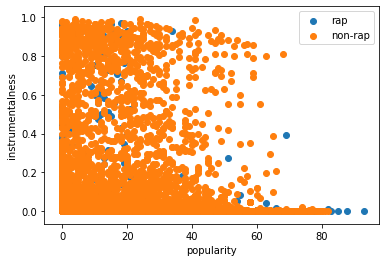

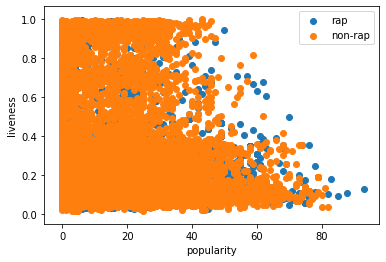

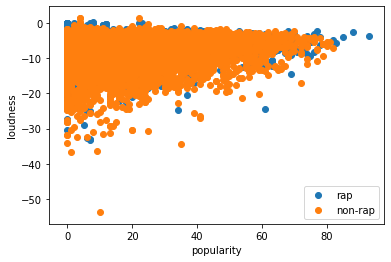

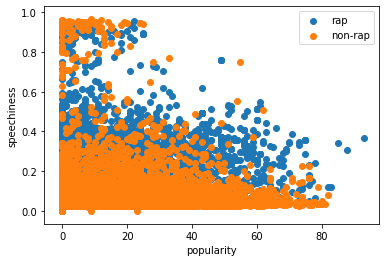

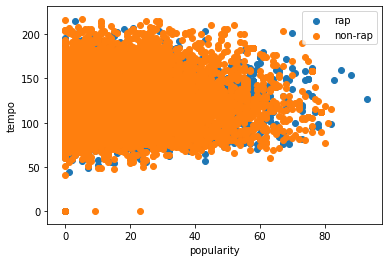

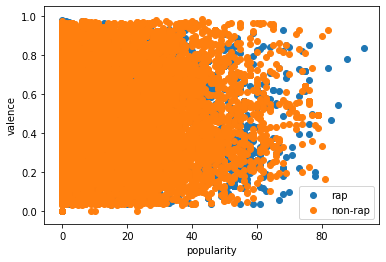

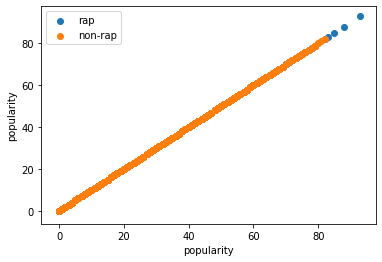

In [163]:
for feature_1 in features: 
    for feature_2 in features:
        plt.figure(1)
        plt.scatter(song_data[song_data.is_rap][feature_1], song_data[song_data.is_rap][feature_2], label='rap')
        plt.scatter(song_data[song_data.is_rap==False][feature_1], song_data[song_data.is_rap==False][feature_2], label='non-rap')
        plt.xlabel(feature_1)
        plt.ylabel(feature_2)
        plt.legend()
        plt.show()

In [164]:
pd.DataFrame({'feature': features, 'importance': rf.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
6,speechiness,0.438306
0,danceability,0.152849
3,instrumentalness,0.083504
7,tempo,0.062407
1,energy,0.052729
2,accousticness,0.050695
8,valence,0.044777
5,loudness,0.043316
4,liveness,0.040740
9,popularity,0.030678


In [42]:
song_data[target].value_counts()

False    611
True     437
Name: is_rap, dtype: int64